# Customer Churn - Tensorflow and Keras

#### Tensorflow: 
Tensorflow is a free and open-source library for machine learning and artificial intelligence. 
It was developed by Google. 
It can be used for developing large-scale machine learning applications.

#### Keras:
Keras is also an open-source library for machine learning and neural network but it higher-level API compared to Tensorflow and can run on top of Tensorflow.

#### Note:
Training of model and execution is fast in Tensorflow, while it is slow in Keras. Thus Keras is used mainly for rapid prototyping and applications dealing with small datasets. Whereas, Tensorflow is used for creating large-scale applications.

## Step 1: Importing libraries and checking for missing and duplicate values

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#check dataset rows and columns
df.shape

(10000, 14)

In [5]:
#check missing values of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#check for duplicate rows
df.duplicated().sum()

0

## Step 2: Checking unique values of the features to check if the dataset is imbalanced and drop irrelevant columns

In [7]:
#check our target variable's unique values
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### The above cell helps us to understand that this is a classical example of imbalanced dataset. 
#### 0 = Customers retained by the bank, 1 = Customers who left the bank

#### Our concern is mainly on creating the model (not the best one, ofcourse) otherwise we would have considered the high imbalance in the dataset.

In [8]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### Drop irrelevant columns

In [9]:
#inplace = True (To make permanent changes in the dataset)
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### We are not doing EDA because we have already done it in our first part. We are only focsuing on building our model using Artificial Neural Network (ANN) with Keras.

## Step 4: One hot encoding categorical columns and Scaling all the columns

#### Encoding features

In [11]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### We have to scale all the values as few values have 6 digits and few only have 1 digit. 
#### This is also very useful while training Neural Networks as the value of the weights does not converge easily. 
#### So, we make sure that before builing a Neural Network model we scale the values beforehand.

### Scaling all the features

In [13]:
# Split dataset
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [14]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [15]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# We will see the transformed values in 2-D array.
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

## Step 5: Time to use Keras

#### Import tensorflow and keras

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # There are 2 types of keras model: Sequential and Non-Sequential. We are focusing on sequential model now.
from tensorflow.keras.layers import Dense 

#### Add layers (adding weights and biases)

In [19]:
model = Sequential()

model.add(Dense(3, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

#### Fitting the trained model 

In [22]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.7483
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6016A: 0s - loss: 0.603
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5259
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4946
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4779A: 0s - loss: 0.
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4589
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4493
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4461
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4410


#### Checking the stored locaion of weights and biases of our trained model

In [23]:
#to fetch where the model weights and biases are stored

#11x3 weights with 3 biases
model.layers[0].get_weights()

[array([[ 0.0271439 ,  0.18402255,  0.1079173 ],
        [ 1.0168953 , -1.9720978 , -1.3122321 ],
        [-0.08968248, -0.03268926,  0.01211126],
        [ 0.5873588 , -0.19693361, -0.21479076],
        [ 0.10463957,  0.1003944 ,  0.15218893],
        [-0.4823586 , -0.07005653, -0.03181623],
        [-1.0564033 ,  0.5101739 ,  0.866854  ],
        [ 0.16587432,  0.08040593, -0.10886946],
        [ 0.5312691 , -0.55274576, -0.74476   ],
        [-0.15270557, -0.11129548,  0.08280617],
        [-0.10405269,  0.4721571 ,  0.6202391 ]], dtype=float32),
 array([-0.33304656,  0.2990037 ,  0.78626764], dtype=float32)]

In [24]:
#3x1 weights with 1 bias
model.layers[1].get_weights()

[array([[ 0.42704305],
        [-0.8352419 ],
        [-1.1275251 ]], dtype=float32),
 array([-0.56383586], dtype=float32)]

## Step 6: Predict

In [25]:
#we are getting the prediction not as 0 and 1 based on the dataset 
#because we are using sigmoid function whose output is between 0 and 1 which is a probability. 
model.predict(X_test_scaled)

array([[0.12649956],
       [0.1375916 ],
       [0.14059338],
       ...,
       [0.08291584],
       [0.14334762],
       [0.34898016]], dtype=float32)

In [26]:
#we need to decide the threshold by ourselves. 
#Here, we are taking the threshold as 0.5 but we should use ROC curve to find out the optimal threshold for our predictions.
y_log = model.predict(X_test_scaled)

In [27]:
#Setting up our threshold at 0.5
y_pred = np.where(y_log > 0.5, 1, 0)

## Step 7: Evaluating model metrics and methods to enhance accuracy score

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7925

In [29]:
#Steps to enhance accuracy score:

#1. Increase the epochs to 100 or even 1000
#2. Change activation function from "sigmoid" to "ReLU"
#3. Increase the no of nodes of layer (Here, from 3 nodes to 10,30 etc., and from 1 to 3,5,etc.,)
#Note: Keep eperimenting with the nodes and layers. If we increase the nodes and layers too much then it will cause overfitting



## Step 8: Enhancing the model performance using the notes listed above

In [30]:
#Changing hidden layers to 11 and adding an extra layer also both having activation function = relu
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [32]:
#adding accuracy also directly
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
#increase epochs to 100. Add valaidation_splits paramater. Here it's 0.2. 
#(Eg: Out of 8000 customers, our model will run on 8000 - 20% customers and 
#test it with the remaining 20% to give the accuracy. This is a very good standard to validate your model performance)

#Note: Our end goal is to reduce the loss and increase the accuracy
#IMP NOTE:Acuuracy of both training and validation set hsould increase gradually. 
#If only training accuracy is increasing and validation acuuracy is stagnant, then it is a case of overfitting

model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 9ms/step - loss: 0.5862 - accuracy: 0.7167 - val_loss: 0.4770 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7983 - val_loss: 0.4453 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7973 - val_loss: 0.4319 - val_accuracy: 0.8094
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8183 - val_loss: 0.4229 - val_accuracy: 0.8175
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8250 - val_loss: 0.4156 - val_accuracy: 0.8206
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8153 - val_loss: 0.4094 - val_accuracy: 0.8213
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8287 - val_loss: 0.4034 - val_accuracy: 0.8263

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8602 - val_loss: 0.3482 - val_accuracy: 0.8487
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8738 - val_loss: 0.3460 - val_accuracy: 0.8525
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8651 - val_loss: 0.3443 - val_accuracy: 0.8506
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8604 - val_loss: 0.3447 - val_accuracy: 0.8500
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8656 - val_loss: 0.3441 - val_accuracy: 0.8506
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8650 - val_loss: 0.3442 - val_accuracy: 0.8537
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8660 - val_loss: 0.3462 - val_accuracy:

In [34]:
#Optional to get every layers weights

#model.layers[0].get_weights()
#model.layers[1].get_weights()
#model.layers[2].get_weights()

In [35]:
y_log = model.predict(X_test_scaled)

In [36]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [37]:
accuracy_score(y_test, y_pred)

0.8595

## Step 9: Plotting and checking loss and accuracy

In [38]:
#we can directly update the previous code. This is for demo purpose

#creating history object to store training and validation (of epochs) data

history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8645 - val_loss: 0.3446 - val_accuracy: 0.8544
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8678 - val_loss: 0.3467 - val_accuracy: 0.8537
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8669 - val_loss: 0.3461 - val_accuracy: 0.8550
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8672 - val_loss: 0.3449 - val_accuracy: 0.8569
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8658 - val_loss: 0.3459 - val_accuracy: 0.8544
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 0.8684 - val_loss: 0.3446 - val_accuracy: 0.8537
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8650 - val_loss: 0.3453 - val_accuracy: 0.8519

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8684 - val_loss: 0.3476 - val_accuracy: 0.8550
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8680 - val_loss: 0.3485 - val_accuracy: 0.8556
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8662 - val_loss: 0.3479 - val_accuracy: 0.8506
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8686 - val_loss: 0.3473 - val_accuracy: 0.8519
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8659 - val_loss: 0.3471 - val_accuracy: 0.8550
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8705 - val_loss: 0.3482 - val_accuracy: 0.8537
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8695 - val_loss: 0.3480 - val_accuracy:

In [39]:
#checking loss, accuracy, val_loss and val_accuracy which are stored inside 'history' object as dictionary format
#(here, it is 100 values each for 100 epochs)

history.history

{'loss': [0.323343425989151,
  0.32282349467277527,
  0.3230467736721039,
  0.3231041431427002,
  0.3231522738933563,
  0.3230046331882477,
  0.32327234745025635,
  0.3225947916507721,
  0.32261696457862854,
  0.32250645756721497,
  0.3233349323272705,
  0.3222979009151459,
  0.32291197776794434,
  0.3229812979698181,
  0.3224606215953827,
  0.32239586114883423,
  0.32176971435546875,
  0.3220667243003845,
  0.32225337624549866,
  0.3222219944000244,
  0.3214552402496338,
  0.32168829441070557,
  0.32192084193229675,
  0.3213273584842682,
  0.32224714756011963,
  0.32144683599472046,
  0.32167530059814453,
  0.32136285305023193,
  0.3209448754787445,
  0.32162487506866455,
  0.3214748501777649,
  0.3211897909641266,
  0.32154151797294617,
  0.3215201199054718,
  0.32052984833717346,
  0.32101622223854065,
  0.3209088444709778,
  0.3205244541168213,
  0.3205585777759552,
  0.32087746262550354,
  0.3204915523529053,
  0.32069942355155945,
  0.32096171379089355,
  0.32049477100372314,
  0

In [40]:
#converting this confusing data into plot for better representation
import matplotlib.pyplot as plt

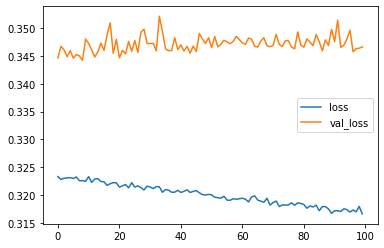

In [41]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

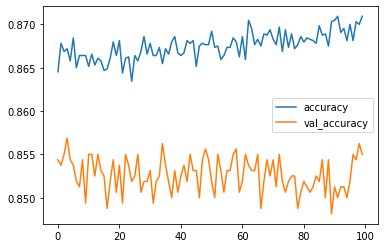

In [42]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()